In [59]:
import numpy as np
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
from math import exp

In [60]:
def kernel(a, b, tau, sigma):
    # Kernal for 2 set of points
    K = np.ones((a.size, b.size))
    for i in range(a.size):
        for j in range(b.size):
            K[i, j] = (sigma**2)*exp(-1/2/(tau**2)*abs(a[i] - b[j]))**2
    return K

def mean(a):
    # Mean Function for GP 
    return np.sin(a)

In [61]:
def gpRegression(x_train, y_train, x_test, t, s):
    y_test = np.zeros((x_test.size,1))
    y_test_var = np.zeros((x_test.size,x_test.size))
    
    K_xx = kernel(x_test, x_test, t, s)
    K_XX = kernel(x_train, x_train, t, s)
    K_xX = kernel(x_test, x_train, t, s)
    
    # Mean of the predicted variable
    y_test = mean(x_test) + np.matmul(np.matmul(K_xX,inv(K_XX)), (y_train - mean(x_train)))
    
    # Variance of predicted variable
    y_test_var = K_xx - np.matmul(K_xX, np.matmul(inv(K_XX), K_xX.transpose()))
    
    return y_test, y_test_var

def plot(X, Y, x, y, y_var, y_mean):
    uncertainty = 1.96 * np.sqrt(np.diag(y_var))
    plt.plot(X, Y, '+')
    plt.plot(x, y_mean)
    plt.plot(x, y)
    plt.fill_between(x, y + uncertainty, y - uncertainty, alpha=0.25)
    plt.legend(['Observations/Training Points', 'Incorrect Model/Mean Function', 'Predicted Model/Test Points'])
    plt.show()
    

C:\Users\HET\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


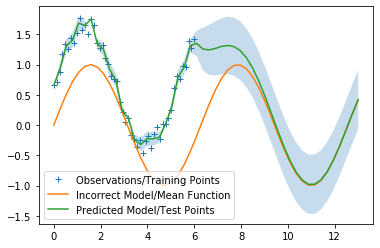

In [67]:
 if __name__== "__main__":
    
    tau = 1
    sigma = 0.25
    n_train = 50
    n_test = 50

    # Training points
    X = np.linspace(0.0, 6, num = n_train)
    Y = np.zeros((n_train,1))
    Y = 0.5 + np.sin(1.2*X)
    
    # Adding noise to training points
    Y = Y + (np.random.rand(n_train,)/3)
    
    # Test Points 
    x = np.linspace(0.0, 13, num = n_test)
    y_mean = np.zeros((n_test, 1))
    y = np.zeros((n_test, 1))
    y_var = np.zeros((n_test, n_test))

    y_mean = mean(x)
    y, y_var = gpRegression(X, Y, x, tau, sigma) 
    
    plot(X, Y, x, y, y_var, y_mean)
    